In [1]:
from __future__ import division
from collections import Counter
import matplotlib.pyplot as plt
import math, random

In [2]:
def random_kid():
    return random.choice(['boy', 'girl'])

In [3]:
# PDF -> Probability Density Function -> Função de Densidade de Probabilidade
def uniform_pdf(x):
    return 1 if x >= 0 and x < 1 else 0

In [4]:
# CDF -> Cumulative Distribution Function -> Função de Distribuição Cumulativa 
def uniform_cdf(x):
    '''retorna a probabilidade de uma variavel aleatória uniforme ser <= x'''
    
    if x < 0:   return 0  # A aleatória uniforme nunca é menor do que 0
    elif x < 1: return x  # Por exemplo P(X <= 4) = 0.4
    else:       return 1  # A aleatória uniforme sempre é menor do que 1

In [5]:
def normal_pdf(x, mu=0, sigma=1):
    sqrt_two_pi = math.sqrt(2 * math.pi)
    return (math.exp(-(x-mu) ** 2 / 2 / sigma ** 2) / (sqrt_two_pi * sigma))

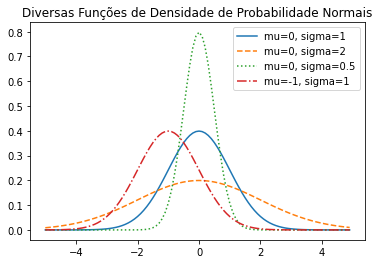

In [9]:
def plot_normal_pdfs():
    xs = [x / 10.0 for x in range(-50, 50)]
    plt.plot(xs,[normal_pdf(x,sigma=1) for x in xs], '-', label='mu=0, sigma=1')
    plt.plot(xs,[normal_pdf(x,sigma=2) for x in xs], '--', label='mu=0, sigma=2')
    plt.plot(xs,[normal_pdf(x,sigma=0.5) for x in xs], ':', label='mu=0, sigma=0.5')
    plt.plot(xs,[normal_pdf(x,mu=-1) for x in xs], '-.', label='mu=-1, sigma=1')
    plt.legend()
    plt.title('Diversas Funções de Densidade de Probabilidade Normais')
    plt.show()
    
plot_normal_pdfs()

In [10]:
def normal_cdf(x, mu=0, sigma=1):
    return (1 + math.erf((x - mu) / math.sqrt(2) / sigma)) / 2

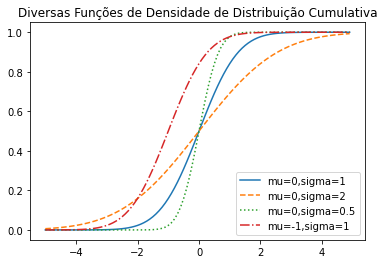

In [11]:
def plot_normal_cdfs():
    xs = [x / 10.0 for x in range(-50,50)]
    plt.plot(xs,[normal_cdf(x,sigma=1) for x in xs],'-',label='mu=0,sigma=1')
    plt.plot(xs,[normal_cdf(x,sigma=2) for x in xs],'--',label='mu=0,sigma=2')
    plt.plot(xs,[normal_cdf(x,sigma=0.5) for x in xs],':',label='mu=0,sigma=0.5')
    plt.plot(xs,[normal_cdf(x,mu=-1) for x in xs],'-.',label='mu=-1,sigma=1')
    plt.legend(loc=4) # bottom right
    plt.title('Diversas Funções de Densidade de Distribuição Cumulativa')
    plt.show()
    
plot_normal_cdfs()

In [12]:
def inverse_normal_cdf(p, mu=0, sigma=1, tolerance=0.00001):
    '''Encontra o inverso mais próximo usando a busca binária'''
    
    # Se não for padrão, computa o padrão e redimensiona
    if mu != 0 or sigma != 1:
        return mu + sigma * inverse_normal_cdf(p,tolerance=tolerance)
    
    low_z, low_p = -10.0, 0 # normal_cdf(-10) está (muito perto de) 0
    hi_z,  hi_p  =  10.0, 1 # normal_cdf(10)  está (muito perto de) 1
    
    while hi_z - low_z > tolerance:
        mid_z = (low_z + hi_z) / 2 # considera o ponto do meio o valor da
        mid_p = normal_cdf(mid_z)  # função de distribuição cumulativa lá
        
        if mid_p < p:
            # O ponto do meio ainda está baixo, procura acima
            low_z, low_p = mid_z, mid_p
        elif mid_p > p:
            # O ponto do meio ainda esta alto, procura abaixo
            hi_z, hi_p = mid_z, mid_p
        else:
            break
            
    return mid_z

In [13]:
def bernoulli_trial(p):
    return 1 if random.random() < p else 0

def binomial(n, p):
    return sum(bernoulli_trial(p) for _ in range(n))

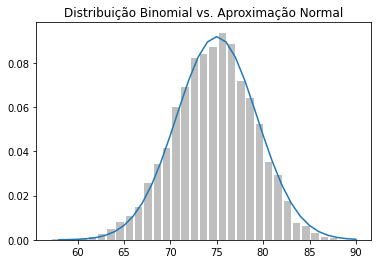

In [15]:
def make_hist(p, n, num_points):
    
    data = [binomial(n, p) for _ in range(num_points)]
    
    # Usa um gráfico de barras para exibir as amostras binomiais atuais
    histogram = Counter(data)
    plt.bar([x - 0.4 for x in histogram.keys()],
            [v / num_points for v in histogram.values()],
            0.8,
            color='0.75')
    
    mu = p * n
    sigma = math.sqrt(n * p * (1 - p))
    
    # Usa um gráfico de linhas para exibir uma aproximação da normal
    xs = range(min(data), max(data) + 1)
    ys = [normal_cdf(i + 0.5, mu, sigma) - normal_cdf(i - 0.5, mu, sigma)
          for i in xs]
    plt.plot(xs, ys)
    plt.title('Distribuição Binomial vs. Aproximação Normal')
    plt.show()
    
make_hist(0.75,100,10000)

In [7]:
if __name__ == '__main__':
    
    #
    # CONDITIONAL PROBABILITY
    #
    
    both_girls = 0
    older_girl = 0
    either_girl = 0

    random.seed(0)
    for _ in range(10000):
        younger = random_kid()
        older = random_kid()

        if older == 'girl':
            older_girl += 1
        if older == 'girl' and younger == 'girl':
            both_girls += 1
        if older == 'girl' or younger == 'girl':
            either_girl += 1

    print(f'P(both | older): {both_girls / older_girl}')   # 0.514 ~ 1/2
    print(f'P(both | either): {both_girls / either_girl}') # 0.342 ~ 1/3

P(both | older): 0.5007089325501317
P(both | either): 0.3311897106109325
